In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Import Library yang dibutuhkan
import zipfile,os,shutil #Library untuk ekstraksi
from sklearn.model_selection import train_test_split #Library untuk split data training dan validasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Library untuk augmentasi dan generate gambar
from tensorflow.keras.optimizers import RMSprop #Library untuk optimasi data
#Pastikan Tensorflow versi 2 atau diatasnya
import tensorflow as tf
print(tf.__version__)
#Libary untuk inputan gambar dan plot grafik
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2.5.0


In [5]:
#Melakukan import dataset dari server
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-28 06:19:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   559KB/s    in 5m 53s  

2021-05-28 06:25:51 (893 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
# Ekstraksi pada file zip sebelumnya
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_folder = '/tmp/rockpaperscissors'
train_folder = os.path.join(base_folder, 'train')
validation_folder = os.path.join(base_folder, 'val')

In [7]:
#Membuat Direktori
os.mkdir(train_folder)
os.mkdir(validation_folder)
#Direktori
rock_folder = os.path.join(base_folder,'rock')
paper_folder = os.path.join(base_folder, 'paper')
scissor_folder = os.path.join(base_folder, 'scissors')

In [8]:
#Folder train untuk masing-masing label
train_rock = os.path.join(train_folder, 'rock')
train_paper = os.path.join(train_folder, 'paper')
train_scissor = os.path.join(train_folder, 'scissors')
validation_rock = os.path.join(validation_folder, 'rock')
validation_paper = os.path.join(validation_folder, 'paper')
validation_scissor = os.path.join(validation_folder, 'scissors')
#Buat Direktori/Folder
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissor)
os.mkdir(validation_rock)
os.mkdir(validation_paper)
os.mkdir(validation_scissor)

In [9]:
#Split Dataset, Pisahkan data train dan validation
#validation = 30% dari semua data
train_rock_folder, validation_rock_folder = train_test_split(os.listdir(rock_folder), test_size = 0.30)
train_paper_folder, validation_paper_folder = train_test_split(os.listdir(paper_folder), test_size = 0.30)
train_scissor_folder, validation_scissor_folder = train_test_split(os.listdir(scissor_folder), test_size = 0.30)

In [10]:
#Copying file and directory/folder
for file in train_rock_folder:
  shutil.copy(os.path.join(rock_folder, file), os.path.join(train_rock, file))
for file in train_paper_folder:
  shutil.copy(os.path.join(paper_folder,file), os.path.join(train_paper,file))
for file in train_scissor_folder:
  shutil.copy(os.path.join(scissor_folder,file), os.path.join(train_scissor,file))
for file in validation_rock_folder:
  shutil.copy(os.path.join(rock_folder, file), os.path.join(validation_rock,file))
for file in validation_paper_folder:
  shutil.copy(os.path.join(paper_folder,file), os.path.join(validation_paper,file))
for file in validation_scissor_folder:
  shutil.copy(os.path.join(scissor_folder,file), os.path.join(validation_scissor,file))

In [11]:
#Augmentasi dan generate gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
#Persiapan Data train dan validasi dari folder yang telah dibuat
train_generator = train_datagen.flow_from_directory(
        train_folder,  # folder data train
        target_size=(150, 150),  # scaling gambar menjadi 150*150 px
        batch_size= 64,
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
validation_generator = test_datagen.flow_from_directory(
        validation_folder, # folder data validasi
        target_size=(150, 150),  #scaling gambar menjadi 150*150 px
        batch_size=32, 
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

Found 1531 images belonging to 3 classes.
Found 657 images belonging to 3 classes.


In [13]:
#Buat Model MLP (3 Layer, 1 layer inputan, 2 hidden layer dengan jumlah neuron 512, layer output (3 jenis klasifikasi))
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.Flatten())#Convert matrix ke array single
model.add(tf.keras.layers.Dense(512, activation ='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [14]:
# Optimize the model use adam (Hyperparameter)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.001, clipnorm = 1),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


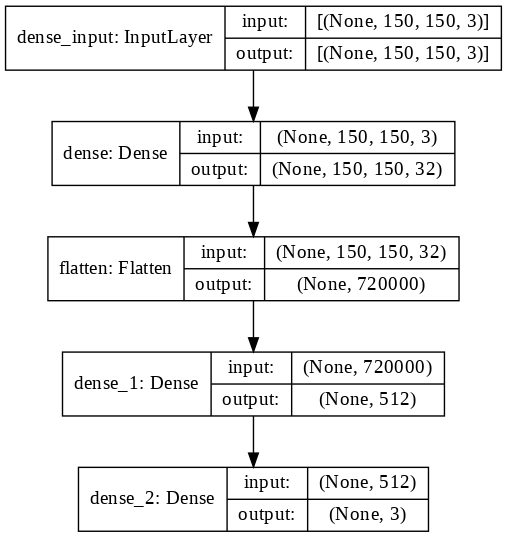

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=100)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150, 150, 32)      128       
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               368640512 
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 368,642,179
Trainable params: 368,642,179
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Callback untuk mencegah overfitting dengan menghentikan training, apabila telah terpenuhi
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nStopped! Akurasi sudah mencapai 96%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [18]:
plot = model.fit(
    train_generator,
    steps_per_epoch = 21, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose =1, #Menampilkan epoh
      callbacks=[stop]
)

Epoch 1/20
21/21 [==============================] - 138s 6s/step - loss: 26.7870 - accuracy: 0.4212 - val_loss: 6.5307 - val_accuracy: 0.6629
Epoch 2/20
21/21 [==============================] - 127s 6s/step - loss: 4.8470 - accuracy: 0.6042 - val_loss: 3.8386 - val_accuracy: 0.5982
Epoch 3/20
21/21 [==============================] - 127s 6s/step - loss: 2.8916 - accuracy: 0.6654 - val_loss: 2.5825 - val_accuracy: 0.6942
Epoch 4/20
21/21 [==============================] - 128s 6s/step - loss: 2.0001 - accuracy: 0.7192 - val_loss: 1.8755 - val_accuracy: 0.7076
Epoch 5/20
21/21 [==============================] - 128s 6s/step - loss: 1.2089 - accuracy: 0.7716 - val_loss: 1.0211 - val_accuracy: 0.7768
Epoch 6/20
21/21 [==============================] - 126s 6s/step - loss: 1.0055 - accuracy: 0.7633 - val_loss: 1.7216 - val_accuracy: 0.6272
Epoch 7/20
21/21 [==============================] - 128s 6s/step - loss: 0.8683 - accuracy: 0.7886 - val_loss: 1.6626 - val_accuracy: 0.6920
Epoch 8/20
2

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
0a3UtNzl5Ll3sq8K.png
This is a Paper


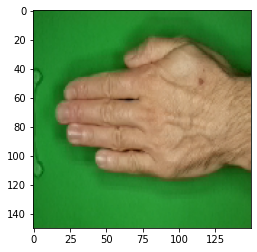

In [20]:
#Input Gambar
%matplotlib inline
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0,0]!=0:
    print('This is a Paper')
  elif classes[0,1]!=0:
    print('This is a Rock')
  else:
    print('This is a Scissor')

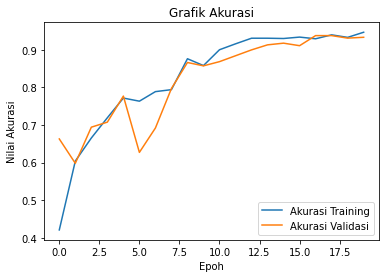

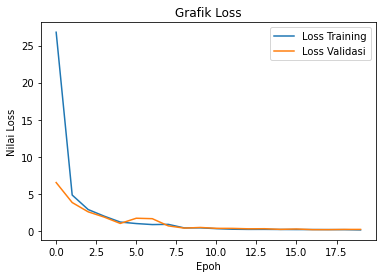

In [21]:
#Accuracy Plot
plt.plot(plot.history['accuracy'], label='Akurasi Training')
plt.plot(plot.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi')
plt.ylabel('Nilai Akurasi')
plt.xlabel('Epoh')
plt.legend(loc="lower right")
plt.show()
#Loss Plot
plt.plot(plot.history['loss'], label='Loss Training')
plt.plot(plot.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss')
plt.ylabel('Nilai Loss')
plt.xlabel('Epoh')
plt.legend(loc="upper right")
plt.show()